In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read the data
data=pd.read_csv("../data/synthetic_dataset.csv")
data.sample(5)
# Drop unnecessary columns
data1 = data.drop(columns=["Transaction_ID", "User_Account_ID"])

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Convert Transaction_Date to numerical (year, month, day)
    df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
    df['Transaction_Year'] = df['Transaction_Date'].dt.year
    df['Transaction_Month'] = df['Transaction_Date'].dt.month
    df['Transaction_Day'] = df['Transaction_Date'].dt.day

    # Convert Transaction_Time to numerical (hour, minute, second)
    df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])
    df['Transaction_Hour'] = df['Transaction_Time'].dt.hour
    df['Transaction_Minute'] = df['Transaction_Time'].dt.minute
    df['Transaction_Second'] = df['Transaction_Time'].dt.second

    # Convert Account_Creation_Date to numerical (year, month, day)
    df['Account_Creation_Date'] = pd.to_datetime(df['Account_Creation_Date'])
    df['Account_Creation_Year'] = df['Account_Creation_Date'].dt.year
    df['Account_Creation_Month'] = df['Account_Creation_Date'].dt.month
    df['Account_Creation_Day'] = df['Account_Creation_Date'].dt.day

    # Encoding categorical column 'Payment_Method' using Label Encoding
    label_encoder = LabelEncoder()
    df['Payment_Method'] = label_encoder.fit_transform(df['Payment_Method'])
    df['Billing_Location']=label_encoder.fit_transform(df['Billing_Location'])
    df['Shipping_Location']=label_encoder.fit_transform(df['Shipping_Location'])
    # Convert Session_Duration and Time_Between_Transactions to numerical (remove 'seconds' suffix)
    df['Session_Duration'] = df['Session_Duration'].apply(lambda x: int(x.split()[0]))
    df['Time_Between_Transactions'] = df['Time_Between_Transactions'].apply(lambda x: int(x.split()[0]))
    
    

    # Convert IP_Address_History and Device_IP_Address to numerical (last part)
    df['IP_Address_History'] = df['IP_Address_History'].apply(lambda x: int(x.split('.')[-1]))
    df['Device_IP_Address'] = df['Device_IP_Address'].apply(lambda x: int(x.split('.')[-1]))

    # Dropping original non-useful columns after preprocessing
    columns_to_drop = ['Transaction_Date', 'Transaction_Time', 'Account_Creation_Date',]
    df.drop(columns=columns_to_drop, inplace=True)

    return df

# Usage example:
preprocess_data(data1)


C:\Users\Yash\AppData\Local\Temp\ipykernel_16648\3387447770.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


,Transaction_Amount,Payment_Method,Billing_Location,Shipping_Location,Device_IP_Address,Session_Duration,Frequency_of_Transactions,Time_Between_Transactions,Unusual_Time_of_Transaction,Unusual_Transaction_Amounts,...,Fraud_Label,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_Hour,Transaction_Minute,Transaction_Second,Account_Creation_Year,Account_Creation_Month,Account_Creation_Day
0,19122.08,0,31,31,225,454,4,466,0,1,...,0,2022,12,18,14,32,43,2022,5,4
1,2090.68,2,0,0,8,806,2,203,3,4,...,0,2022,2,24,7,58,38,2022,11,16
2,9247.22,0,30,30,158,462,3,1422,2,3,...,0,2022,8,9,12,59,59,2022,12,29
3,7686.80,1,68,68,60,363,1,1895,1,3,...,0,2022,12,22,0,20,42,2022,2,14
4,3693.87,1,95,69,188,263,8,1281,4,0,...,0,2022,2,21,19,20,27,2022,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,270.93,1,15,95,72,793,10,1082,2,4,...,0,2022,10,15,23,45,15,2022,8,9
9996,17618.49,2,70,70,94,780,1,883,1,2,...,0,2022,1,6,16,13,36,2022,6,1
9997,14286.99,0,100,100,184,275,1,106,4,4,...,0,2022,9,8,13,4,17,2022,6,11
9998,3036.76,1,1,71,6,602,4,1997,2,2,...,0,2022,12,17,0,42,10,2022,1,22


In [4]:
# Splitting into features (X) and target variable (y)
X = data1.drop(columns=['Fraud_Label'])
y = data1['Fraud_Label']

In [5]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)


In [9]:
# Train the classifiers
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [6]:
# Building the Neural Network
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
# Training the Neural Network
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 23.4501 - accuracy: 0.7151
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 11.3304 - accuracy: 0.7205
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 10.2736 - accuracy: 0.7264
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 10.6825 - accuracy: 0.7203
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 10.3946 - accuracy: 0.7215
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 8.0671 - accuracy: 0.7231
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 8.9315 - accuracy: 0.7154
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 8.0163 - accuracy: 0.7291
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 5.3795 - accuracy: 0.7215
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 7.2011 - a

In [12]:
# Making predictions with each model
rf_preds = rf_classifier.predict(X_test)
xgb_preds = xgb_classifier.predict(X_test)
nn_probs = nn_model.predict(X_test)  # Predict probabilities


63/63 [==============================] - 0s 2ms/step


In [15]:
# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
nn_preds = np.where(nn_probs > 0.5, 1, 0)

In [16]:
# Combine predictions
combined_predictions = pd.DataFrame({
    'RandomForest': rf_preds,
    'XGBoost': xgb_preds,
    'NeuralNetwork': nn_preds.flatten()
})

In [17]:
# Initialize a meta-classifier (VotingClassifier, for instance)
meta_classifier = RandomForestClassifier(random_state=42)

In [18]:
# Training the meta-classifier on combined predictions
meta_classifier.fit(combined_predictions, y_test)

RandomForestClassifier(random_state=42)

In [19]:
# Making predictions on the test set using the ensemble
combined_test_predictions = pd.DataFrame({
    'RandomForest': rf_classifier.predict(X_test),
    'XGBoost': xgb_classifier.predict(X_test),
    'NeuralNetwork': np.where(nn_model.predict(X_test) > 0.5, 1, 0).flatten()
})

63/63 [==============================] - 0s 3ms/step


In [20]:
ensemble_predictions = meta_classifier.predict(combined_test_predictions)


In [21]:
# Evaluating the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {accuracy:.2f}")

Ensemble Accuracy: 0.96


63/63 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9450


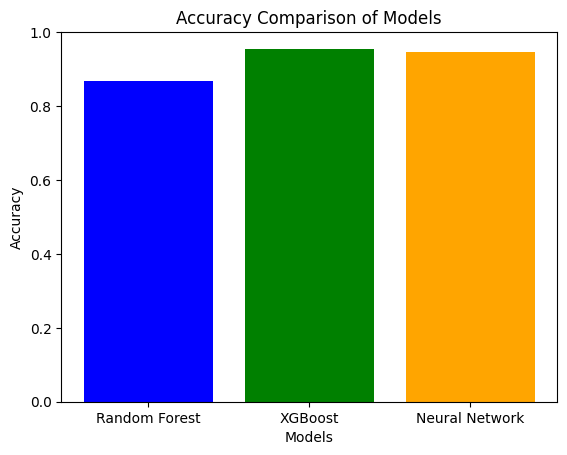

In [24]:
# Evaluate each model
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb_classifier.predict(X_test))
nn_accuracy = nn_model.evaluate(X_test, y_test)[1]

# Plotting the accuracies
models = ['Random Forest', 'XGBoost', 'Neural Network']
accuracies = [rf_accuracy, xgb_accuracy, nn_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)  # Set the y-axis limit to range from 0 to 1 for better visualization
plt.show()

In [29]:
# Splitting the data into training, validation, and testing sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize models
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

In [35]:
# Building and training the Neural Network
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/120


188/188 [==============================] - 2s 4ms/step - loss: 20.4311 - accuracy: 0.7105 - val_loss: 7.4297 - val_accuracy: 0.7875
Epoch 2/120
188/188 [==============================] - 1s 4ms/step - loss: 14.1006 - accuracy: 0.7192 - val_loss: 3.8001 - val_accuracy: 0.7745
Epoch 3/120
188/188 [==============================] - 1s 3ms/step - loss: 22.4933 - accuracy: 0.7183 - val_loss: 45.2028 - val_accuracy: 0.8260
Epoch 4/120
188/188 [==============================] - 1s 3ms/step - loss: 14.4640 - accuracy: 0.7215 - val_loss: 7.9614 - val_accuracy: 0.8270
Epoch 5/120
188/188 [==============================] - 1s 5ms/step - loss: 11.4112 - accuracy: 0.7235 - val_loss: 44.2195 - val_accuracy: 0.8245
Epoch 6/120
188/188 [==============================] - 1s 3ms/step - loss: 18.4217 - accuracy: 0.7222 - val_loss: 4.9964 - val_accuracy: 0.7820
Epoch 7/120
188/188 [==============================] - 0s 3ms/step - loss: 15.9914 - accuracy: 0.7205 - val_loss: 3.8857 - val_accuracy: 0.8080
Ep

 1/63 [..............................] - ETA: 2s - loss: 0.1568 - accuracy: 0.9375

63/63 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9530


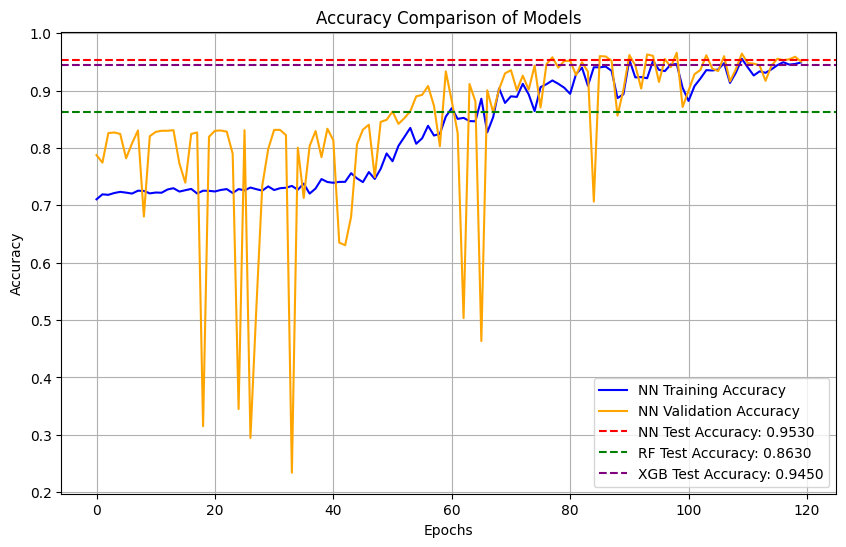

In [36]:
# Evaluate Neural Network on test set
_, nn_test_acc = nn_model.evaluate(X_test, y_test)


# Accuracy for Random Forest and XGBoost
rf_acc = accuracy_score(y_test, rf_classifier.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb_classifier.predict(X_test))

# Plotting the accuracies
plt.figure(figsize=(10, 6))

# Plotting Neural Network accuracy over epochs
plt.plot(history.history['accuracy'], label='NN Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='NN Validation Accuracy', color='orange')

# Show the test accuracy of Neural Network, Random Forest, and XGBoost
plt.axhline(y=nn_test_acc, color='red', linestyle='--', label=f'NN Test Accuracy: {nn_test_acc:.4f}')
plt.axhline(y=rf_acc, color='green', linestyle='--', label=f'RF Test Accuracy: {rf_acc:.4f}')
plt.axhline(y=xgb_acc, color='purple', linestyle='--', label=f'XGB Test Accuracy: {xgb_acc:.4f}')

plt.title('Accuracy Comparison of Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()